In [1]:
import os

relativePath = os.getcwd()
folders=['midterm']
subfolders= ['data']
sfolders=['enron']
if os.path.isdir(relativePath+'/midterm/data/enron') == 0:
    for folder in folders:
        os.mkdir(os.path.join(relativePath,folder))
        for subfolder in subfolders:
            os.mkdir(os.path.join(relativePath,folder,subfolder))
            for sfolder in sfolders:
                os.mkdir(os.path.join(relativePath,folder,subfolder,sfolder))
else:
    print(relativePath)

C:\Users\DELL PC


In [37]:
def getDate(file, dateList):
    with open(file, "r") as f:
        data = f.read()
    email = Parser().parsestr(data)
    datesin= email['date']
    datesin=datesin[7:16].replace(" ","")
    dateList.append(datesin)
        


dateList = []
for directory, subDirectory, fileNames in os.walk(relativePath+folder+'users\maildir/'):
    if 'deleted_items' in directory:
        for file in fileNames:
            getDate(os.path.join(directory, file), dateList)
frequencyIn={}
for c in dateList:
    count=frequencyIn.get(c,0)
    frequencyIn[c] = count + 1
sortedDictIn = sorted(frequencyIn.items(), key=lambda x: (-x[1], x[0])) # sorted is used to sort dictionary in descending order. 
print(sortedDictIn)

    

[('Oct2001', 15020), ('Jan2002', 11304), ('Nov2001', 10101), ('Dec2001', 2578), ('Feb2002', 2535), ('May2001', 2432), ('Jun2001', 2182), ('Mar2002', 1232), ('Sep2001', 1080), ('Aug2001', 938), ('Jul2001', 758), ('May2002', 296), ('Apr2002', 270), ('Jun2002', 207), ('Apr2001', 165), ('Mar2001', 35), ('Oct0001', 33), ('Feb2004', 28), ('Dec0001', 24), ('Nov0001', 23), ('Feb2001', 18), ('Jan0002', 13), ('Jan2001', 11), ('Feb0002', 5), ('Mar0002', 4), ('Aug0001', 3), ('Oct2000', 3), ('Sep0001', 3), ('Nov2000', 2), ('Nov2012', 2), ('Apr1986', 1), ('Dec2005', 1), ('Feb2000', 1), ('Jan2000', 1), ('Jul1999', 1), ('Jun0001', 1), ('Mar2000', 1), ('May0001', 1), ('May1986', 1), ('May2024', 1), ('Sep2000', 1)]


In [40]:
i = 1
priorityList = []

# Looping in order to assign priority to each month.
for priority in range(len(sortedDictIn)):
    obj1 = sortedDictIn[priority]
    obj1 = obj1 + (i,)
    priorityList.append(obj1)
    i = i+1
print(priorityList)

[('Oct2001', 15020, 1), ('Jan2002', 11304, 2), ('Nov2001', 10101, 3), ('Dec2001', 2578, 4), ('Feb2002', 2535, 5), ('May2001', 2432, 6), ('Jun2001', 2182, 7), ('Mar2002', 1232, 8), ('Sep2001', 1080, 9), ('Aug2001', 938, 10), ('Jul2001', 758, 11), ('May2002', 296, 12), ('Apr2002', 270, 13), ('Jun2002', 207, 14), ('Apr2001', 165, 15), ('Mar2001', 35, 16), ('Oct0001', 33, 17), ('Feb2004', 28, 18), ('Dec0001', 24, 19), ('Nov0001', 23, 20), ('Feb2001', 18, 21), ('Jan0002', 13, 22), ('Jan2001', 11, 23), ('Feb0002', 5, 24), ('Mar0002', 4, 25), ('Aug0001', 3, 26), ('Oct2000', 3, 27), ('Sep0001', 3, 28), ('Nov2000', 2, 29), ('Nov2012', 2, 30), ('Apr1986', 1, 31), ('Dec2005', 1, 32), ('Feb2000', 1, 33), ('Jan2000', 1, 34), ('Jul1999', 1, 35), ('Jun0001', 1, 36), ('Mar2000', 1, 37), ('May0001', 1, 38), ('May1986', 1, 39), ('May2024', 1, 40), ('Sep2000', 1, 41)]


In [41]:
import csv

#Writing to the csv file
file= 'C:/Users/DELL PC/deletedEmail.csv'

with open(file, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Month-Year", "EmailDeleted", "Priority"])
    a.writerows(priorityList)

In [42]:
import matplotlib.pyplot as plt
label = []
y = []
z = []

# Reading CSV file in order to generate loglog figure.
with open(file,'r') as csvfile:
    next(csvfile)
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))

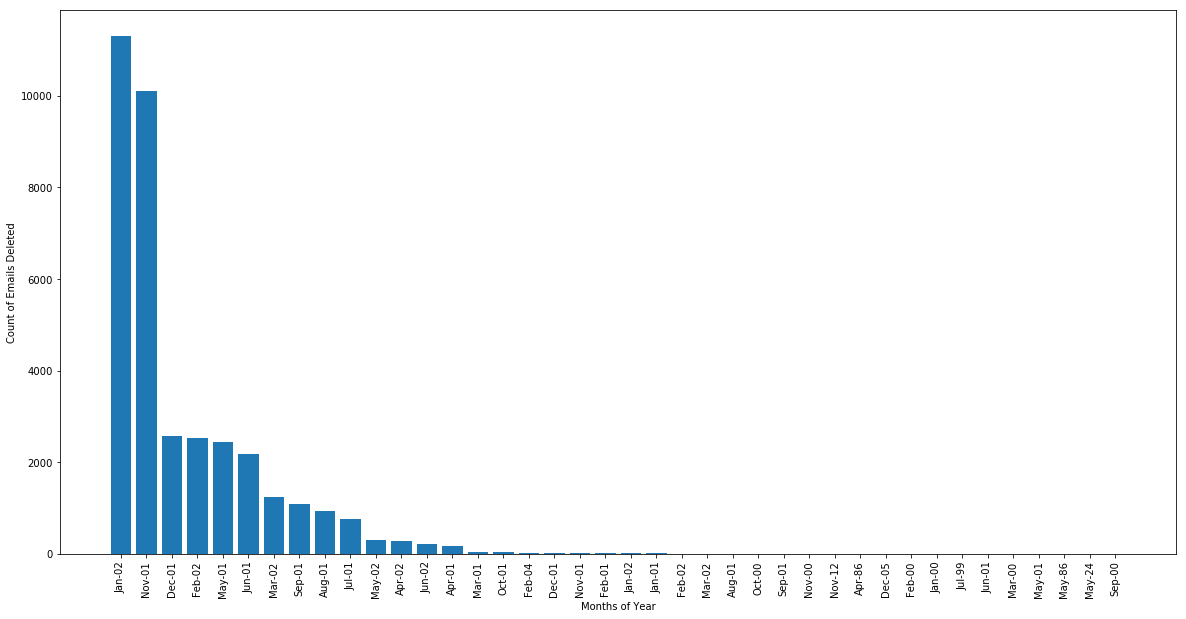

In [46]:
#Plotting and saving the plot
pltFig = relativePath+"/"+'emailsDel.png'

pltFig = relativePath+"/"+'emailsSent.png'

plt.figure(figsize=(20,10))
plt.bar(z, y, align='center')
plt.xticks(z, label, rotation=90)
plt.xlabel("Months of Year")
plt.ylabel("Count of Emails Deleted")
plt.savefig(pltFig, bbox_inches='tight')
plt.show()